### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# check for unique values in columns and make sure no typos
categoricals = data.select_dtypes(include='object').columns
unique = data[categoricals].apply(lambda col: print(f"{col.name}: {col.unique()}"))
unique

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Suppor

destination             None
passanger               None
weather                 None
time                    None
coupon                  None
expiration              None
gender                  None
age                     None
maritalStatus           None
education               None
occupation              None
income                  None
car                     None
Bar                     None
CoffeeHouse             None
CarryAway               None
RestaurantLessThan20    None
Restaurant20To50        None
dtype: object

In [7]:
# check for outliers, negatives
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# count null values for each column
missing = data.isnull().sum().sort_values(ascending=False)
missing

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# car has a huge amount of NaN so we can assume the person doesn't drive if its null
data['car'] = data['car'].fillna('do not drive')
# we can also assume number of times for these columns with NaN - RestaurantLessThan20, CoffeeHouse, Restaurant20To50, CarryAway, Bar are 'never'
cols_to_replace = ['RestaurantLessThan20', 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'Bar']
data[cols_to_replace] = data[cols_to_replace].fillna('never')
missing = data.isnull().sum().sort_values(ascending=False)
missing

destination             0
passanger               0
direction_opp           0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
car                     0
income                  0
occupation              0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [10]:
acceptance_rate = data['Y'].mean()
print(f'{round(acceptance_rate * 100)}% of coupons were accepted')
# 57%

57% of coupons were accepted


5. Use a bar plot to visualize the `coupon` column.

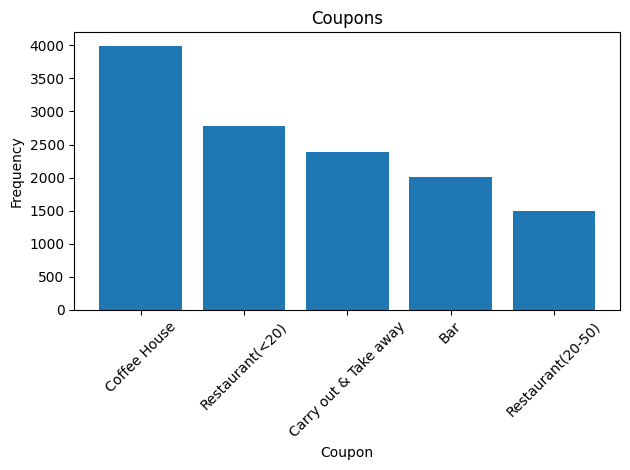

In [11]:
coupon = data['coupon'].value_counts()
plt.bar(coupon.index, coupon.values)
plt.title("Coupons")
plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

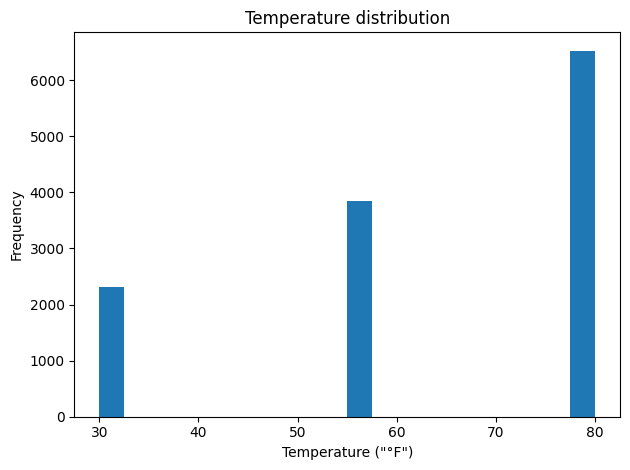

In [12]:
plt.hist(data['temperature'], bins=20)
plt.title('Temperature distribution')
plt.xlabel('Temperature ("°F")')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
df_bar = data[data['coupon'] == 'Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [14]:
df_bar_acceptance_rate = df_bar['Y'].mean()
print(f'{round(df_bar_acceptance_rate * 100)}% of bar coupons were accepted')
# 41%

41% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
def goes_to_bar_often(val):
    if pd.isnull(val) or val in ['never', 'less than once', '1~3']:
        return 0 
    else:
        return 1 

# create a new column bar_freq_group so we can perform operations
df_bar['bar_freq_group'] = df_bar['Bar'].apply(goes_to_bar_often)
acceptance_by_group = df_bar.groupby('bar_freq_group')['Y'].mean()
three_or_fewer = acceptance_by_group.loc[0]

print(f'{round(three_or_fewer * 100)}% of bar coupons were accepted for those who went to a bar 3 or fewer times.')    

34% of bar coupons were accepted for those who went to a bar 3 or fewer times.


/var/folders/mr/6lsbmx7n2213xttzgk6h4b5h0000gq/T/ipykernel_76034/2839306237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['bar_freq_group'] = df_bar['Bar'].apply(goes_to_bar_often)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
# we are going to modify age to be a number so we can perform < > operations:
data['age'] = data['age'].apply(lambda x: 20 if x == 'below21' else (55 if x == '50plus' else int(x)))

# we want to convert 'Bar' values to estimated numeric frequency
def bar_to_numeric(val):
    if val == 'never' or pd.isnull(val):
        return 0
    elif val == 'less than once':
        return 0.5
    elif val == '1~3':
        return 2
    elif val == '4~8':
        return 6
    elif val == 'gt8':
        return 10
    else:
        return None

data['bar_freq_num'] = data['Bar'].apply(bar_to_numeric)
check = (data['bar_freq_num'] > 1) & (data['age'] > 25)
age_25_bar_often = data[check]
others = data[~check]

age_25_bar_often_rate = age_25_bar_often['Y'].mean()
others_rate = others['Y'].mean()

print(f'{round(age_25_bar_often_rate * 100)}% are over 25 & go to the bar more than once a month')
print(f'{round(others_rate * 100)}% are under 25 or go to the bar less often')
print(f'There is a {round((age_25_bar_often_rate - others_rate) * 100)}% difference between the two.')

62% are over 25 & go to the bar more than once a month
55% are under 25 or go to the bar less often
There is a 7% difference between the two.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [31]:
def not_with_kid(val):
    return val != 'Kid(s)'

def not_farmer_fisher_forester(val):
    return val != 'Farming Fishing & Forestry'

select_group = data[
    data['Bar'].apply(goes_to_bar_often) &
    data['passanger'].apply(not_with_kid) &
    data['occupation'].apply(not_farmer_fisher_forester)
]

others = data[
    ~(data['Bar'].apply(goes_to_bar_often) &
    data['passanger'].apply(not_with_kid) &
    data['occupation'].apply(not_farmer_fisher_forester)
    )
]

select_group_rate = select_group['Y'].mean()
others_rate = others['Y'].mean()

print(f"The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is {round(select_group_rate * 100)}%")
print(f"The acceptance rate for all others is {round(others_rate * 100)}% ")
print(f"There is a {round((select_group_rate - others_rate) * 100)}% difference between the two.")

The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 59%
The acceptance rate for all others is 56% 
There is a 3% difference between the two.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [32]:
group_1 = data[
    data['Bar'].apply(goes_to_bar_often) &
    data['passanger'].apply(not_with_kid) &
    data['maritalStatus'] != 'Widowed'
]
group_2 = data[
    data['Bar'].apply(goes_to_bar_often) &
    data['age'] < 30
]

# we need annother function to use a cheap resturant frequency metric to perform operations
def cheap_restaurants_freq(val):
    if val == 'never' or pd.isnull(val):
        return 0
    elif val == 'less than once':
        return 0.5
    elif val == '1~3':
        return 2
    elif val == '4~8':
        return 6
    elif val == 'gt8':
        return 10
    else:
        return None
        
data['cheap_rest_freq'] = data['RestaurantLessThan20'].apply(cheap_restaurants_freq)
group_3 = data[
    (data['cheap_rest_freq'] > 4) &
    (data['income'] == '$100000 or More')
]

# Others
group_1_rate = group_1['Y'].mean()
group_2_rate = group_2['Y'].mean()
group_3_rate = group_3['Y'].mean()

# Print
print(f"{round(group_1_rate * 100)}% accepted the coupon who got to bars more than once a month, not with kids, not widowed)")
print(f"{round(group_2_rate * 100)}% accepted the coupon who got to bars more than once a month and are under 30)")
print(f"{round(group_3_rate * 100)}% accepted the coupon who have an income > $100K & visit cheap restaurants more than 4 times)")

57% accepted the coupon who got to bars more than once a month, not with kids, not widowed)
57% accepted the coupon who got to bars more than once a month and are under 30)
61% accepted the coupon who have an income > $100K & visit cheap restaurants more than 4 times)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observed acceptance rates, drivers who are social and visit bars more than once a month are more likely to redeem Bar coupons. Drivers under 30 who don't have children also show a higher likelihood of acceptance which suggests that lifestyle and social habits influence acceptance of bar coupons. There is also another trend with high income earners who regularly visit inexpensive restaurants accept coupons which indicates these people seek value for mon behavior transcends income brackets. Overall, Bar coupon acceptance appears to be driven more by social engagement and spending patterns than by income alone.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

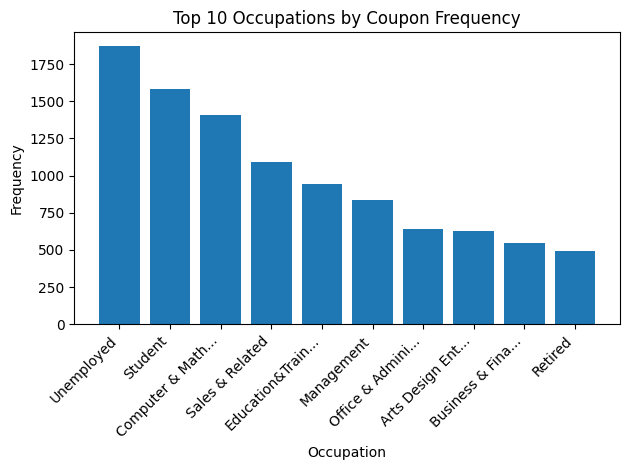

In [40]:
occupation = data['occupation'].value_counts().head(10)

# shorten label size because some occupation text length is too long
labels = [label[:15] + '...' if len(label) > 15 else label for label in occupation.index]

plt.bar(labels, occupation.values)
plt.title("Top 10 Occupations by Coupon Frequency")
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
# we can see the largest occupations are student and unemployed, lets see the acceptance rate for each
students = data[data['occupation'] == 'Student']
unemployed = data[data['occupation'] == 'Unemployed']

acceptance_rate_student = students['Y'].mean()
acceptance_rate_unemployed = unemployed['Y'].mean()

print(f'Student drivers have an acceptance rate of {round(acceptance_rate_student * 100)}%')
print(f'Unemployed drivers have an acceptance rate of {round(acceptance_rate_unemployed * 100)}%')

Student drivers have an acceptance rate of 61%
Unemployed drivers have an acceptance rate of 55%


In [52]:
# student are above the overall acceptance meaning students are more likely to accept coupons
# unemployed are just under the overall acceptance rate
# now we want to look at students who have a partner, are they more likely to accept coupons
def students_have_partner(val):
    return val in ['Unmarried partner', 'Married partner']

students_with_partners = students[students['maritalStatus'].apply(students_have_partner)]
students_with_partners_acceptance_rate = students_with_partners['Y'].mean()

print(f'Student drivers with partners have an acceptance rate of {round(students_with_partners_acceptance_rate * 100)}%')

Student drivers with partners have an acceptance rate of 57%


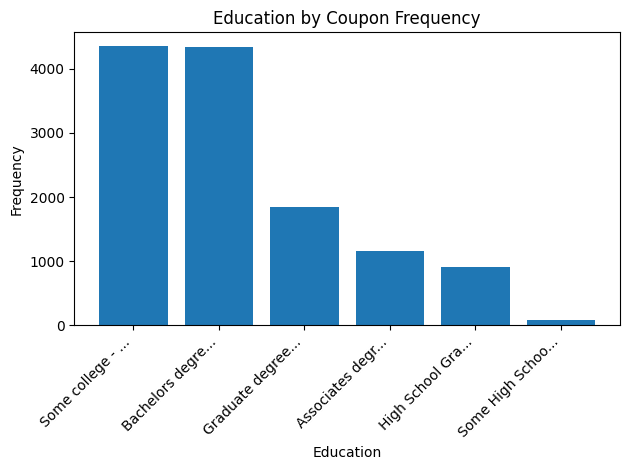

In [54]:
# only 57% of students who have partners accept coupons which shows that a partner has a slight influence on the acceptance rate but its not strong
# lets look more broadly if education impacts acceptance
education = data['education'].value_counts()

# shorten label size because some occupation text length is too long
labels = [label[:15] + '...' if len(label) > 15 else label for label in education.index]

plt.bar(labels, education.values)
plt.title("Education by Coupon Frequency")
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

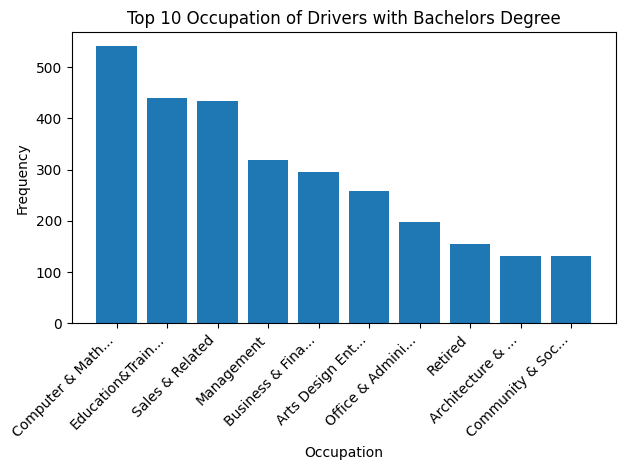

In [71]:
# we can see both 'Some college - no degree' and 'Bachelors degree' show high acceptance rate
# lets dig deeper into the occupation of 'Bachelors degree'
drivers_with_bachelor = data[data['education'] == 'Bachelors degree']
occupation_bachelor = drivers_with_bachelor['occupation'].value_counts()

# we want to only include working drivers
occupation_bachelor = occupation_bachelor.drop(['Unemployed', 'Student'])
occupation_bachelor = occupation_bachelor.head(10)

# shorten label size because some occupation text length is too long
labels = [label[:15] + '...' if len(label) > 15 else label for label in occupation_bachelor.index]

plt.bar(labels, occupation_bachelor.values)
plt.title("Top 10 Occupation of Drivers with Bachelors Degree")
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
# lets see the acceptance rate of drivers with a bachelors degree and working in Computer and mathematical
selected_group = data[(data['education'] == 'Bachelors degree') & (data['occupation'] == 'Computer & Mathematical')]
selected_group_acceptance_rate = selected_group['Y'].mean()

print(f'Student drivers with a bachelors degree and work in Computer & Mathematical have an acceptance rate of {round(selected_group_acceptance_rate * 100)}%')

Student drivers with a bachelors degree and work in Computer & Mathematical have an acceptance rate of 54%


In [77]:
# the acceptance rate of drivers with a bachelors degree and working in Computer and mathematical doesn't show a strong correlation
# lets keep looking

# Filter to single people offered Coffee House coupon
single_coffee = data[
    (data['coupon'] == 'Coffee House')
]

# Calculate acceptance rate
acceptance_rate = single_coffee['Y'].mean()

# Print result as a percentage
print(f"Acceptance rate of single people for Coffee House coupon: {round(acceptance_rate * 100, 2)}%")

Acceptance rate of single people for Coffee House coupon: 49.92%
